<h2 align="right">Case Study 2</h2> 
<h1 align="center">Case Study on Measures of Central Tendency and Dispersion</h1><br/>
<h2>Objectives :</h2><br>
An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information from their StudentsPerformance dataset.

<ol>
<li>Find out how many males and females participated in the test. </li>
<li>What do you think about the students' parental level of education?</li>
<li>Who scores the most on average for math, reading and writing based on
    <ul>
    <li>Gender </li>
    <li>Test preparation course </li>
    </ul>
</li>
<li>What do you think about the scoring variation for math, reading and writing based on 
    <ul>
    <li>Gender </li>
    <li>Test preparation course </li>
    </ul>
</li>
<li>The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.
</li>
</ol>


In [121]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: inset;
    table {float:left}
    }
</style>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [123]:
#read dataset to pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1.Find out how many males and females participated in the test. 

In [124]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

##### Number of Males  : 482
##### Number of Femles  : 518   
<br/>
<br/>
<br/>


# 2. What do you think about the students' parental level of education?

In [125]:
#find number of parents belonging to each level of education(highest education):
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [126]:
#for getting total score of each student:
df1=df[['math score','reading score','writing score']]
#add total score column to the dataframe df:
df['total score']= df1.sum(axis=1)

In [127]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

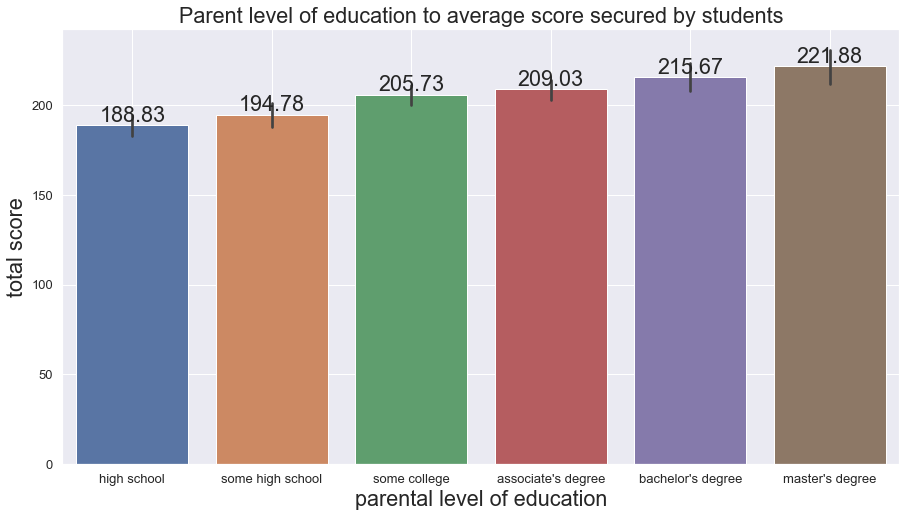

In [128]:
result = df.groupby(["parental level of education"])['total score'].mean().reset_index().sort_values('total score')
fig, ax = plt.subplots(figsize=(15, 8))
e=sns.barplot(x="parental level of education", y="total score", data=df, order=result['parental level of education'])
for p in e.patches:
    e.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Parent level of education to average score secured by students')
plt.grid(True)

#### INSIGHTS
|Parental level of education|number of students|
|:-:|:-:|
| Master's Degree  | 59 |
| Bachelor's Degree | 118 |
| Some High School | 179 |
| High School | 196 |
| Associate's Degree | 222 |
| Some College | 226 |

<li>Parents holding a Master's Degree is very lower compared to other levels of education.</li>
<li>Most of the parents have attended some college. </li>
When comparing the average of total score secured by the students and their parent's level of education we can infer that:
<li>Student's whose parents are mostly educated have secured highest average scores.</li>
<li>Student's whose parents education level falls to 'some college' and 'Associate's Degree' seems to have almost similar average scores.</li>
<li>Student's whose parents have the lowest level of education have secured lowest average scores.</li>
<br/>
<br/>
<br/>

# 3. Who scores the most on average for math, reading and writing based on 
## ● Gender 
## ● Test preparation course 

In [129]:
df1=df.groupby(["gender"], as_index=False).agg({'math score':"mean", 'reading score':"mean", 'writing score':"mean"})
df1.style.highlight_max(color = 'lightgreen', axis = 0)


,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


##### <li>Male students got highest average scores in maths.</li>
##### <li>Female students got highest average scores in both reading and writing</li>
<br/>

In [130]:
df2=df.groupby(["test preparation course"], as_index=False).agg({'math score':"mean", 'reading score':"mean", 'writing score':"mean"})
df2.style.highlight_max(color = 'lightgreen', axis = 0)

,test preparation course,math score,reading score,writing score
0,completed,69.966480,74.175978,74.684358
1,none,63.789720,66.417445,64.457944


##### <li>Students who have completed the Test preperation course have got highest average in all maths, reading and writing.</li>
<br/>


### Let's plot a graph to visually analyze the gender vs avg score and test preparation course vs avg score

[Text(0, 0, 'Completed'), Text(1, 0, 'None')]

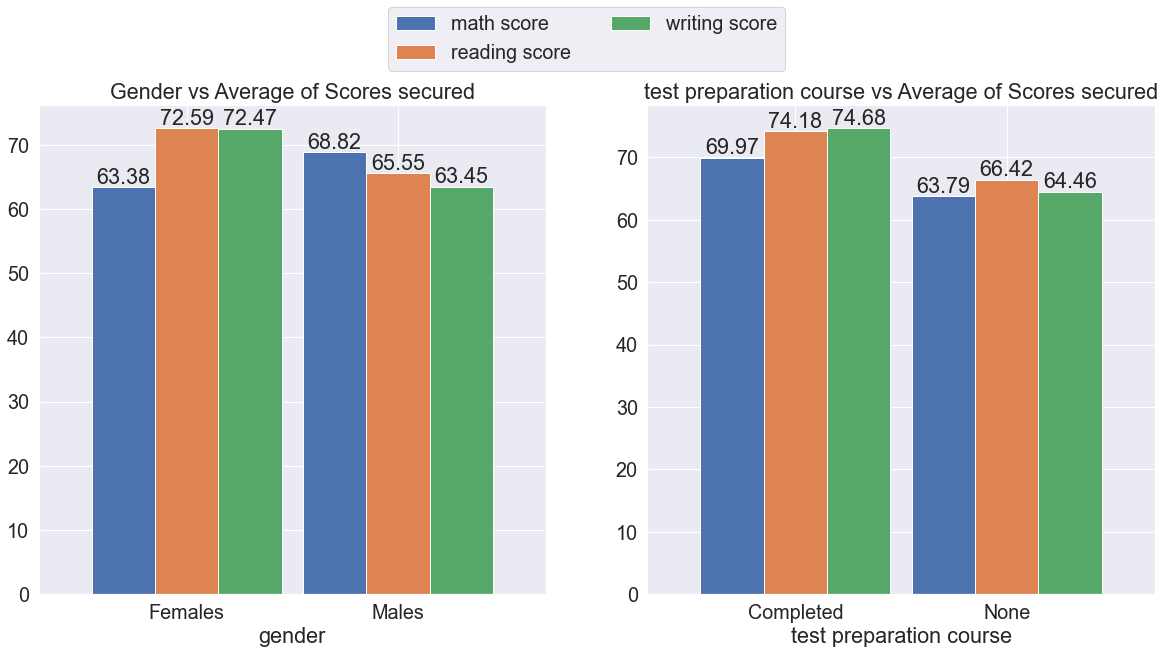

In [131]:
result1 = df.groupby(["gender"], as_index=False).agg({'math score':"mean", 'reading score':"mean", 'writing score':"mean"})
result2 = df.groupby(["test preparation course"], as_index=False).agg({'math score':"mean", 'reading score':"mean", 'writing score':"mean"})
fig, ax = plt.subplots(1,2,figsize=(20, 9))
g=result1.plot(x="gender", y=["math score", "reading score", 'writing score'], kind="bar",ax=ax[0],width=0.9)
tpc=result2.plot(x="test preparation course", y=["math score", "reading score", 'writing score'], kind="bar",ax=ax[1],width=0.9)
#tpc=sns.barplot(x="test preparation course", y="total score", data=df, order=result2['test preparation course'],ax=ax[1])
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for q in tpc.patches:
    tpc.annotate(format(q.get_height(), '.2f'), (q.get_x() + q.get_width() / 2., q.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[0].set_title('Gender vs Average of Scores secured')
ax[1].set_title('test preparation course vs Average of Scores secured')
for axis in ax:
    axis.grid(True)
sns.set(font_scale=1.8)
g.legend(loc="lower center", bbox_to_anchor=(1.08, 1.05), ncol= 2)
tpc.get_legend().remove()
g.set_xticklabels(labels=["Females", "Males"], rotation=0)
tpc.set_xticklabels(labels=["Completed", "None"], rotation=0)

<b>INSIGHTS</b>
<li>Female students have a good reading and writing ability and scored(avg) 72.59 and 72.47 respectively(higher than males)</li>
<li>Average scores for Male students for maths is higher than female students.</li>
<li>Students who have under gone test preparation cousrse have scored higher in all 3 subjects than others.</li>
<br>
<br>
<br>


# 4. What do you think about the scoring variation for math, reading and writing based on 
## ● Gender 
## ● Test preparation course

In [132]:
df3=df.groupby(["gender"], as_index=False).agg({'math score':"var", 'reading score':"var", 'writing score':"var"})
df3.style.highlight_max(color = 'lightgreen', axis = 0)


,gender,math score,reading score,writing score
0,female,256.958593,207.677438,220.369327
1,male,211.889097,200.211010,202.413924


In [133]:
df4=df.groupby(["test preparation course"], as_index=False).agg({'math score':"var", 'reading score':"var", 'writing score':"var"})
df4.style.highlight_max(color = 'lightgreen', axis = 0)

,test preparation course,math score,reading score,writing score
0,completed,210.884027,183.265864,175.202612
1,none,246.668662,213.419851,226.251739


[Text(0, 0, 'Completed'), Text(1, 0, 'None')]

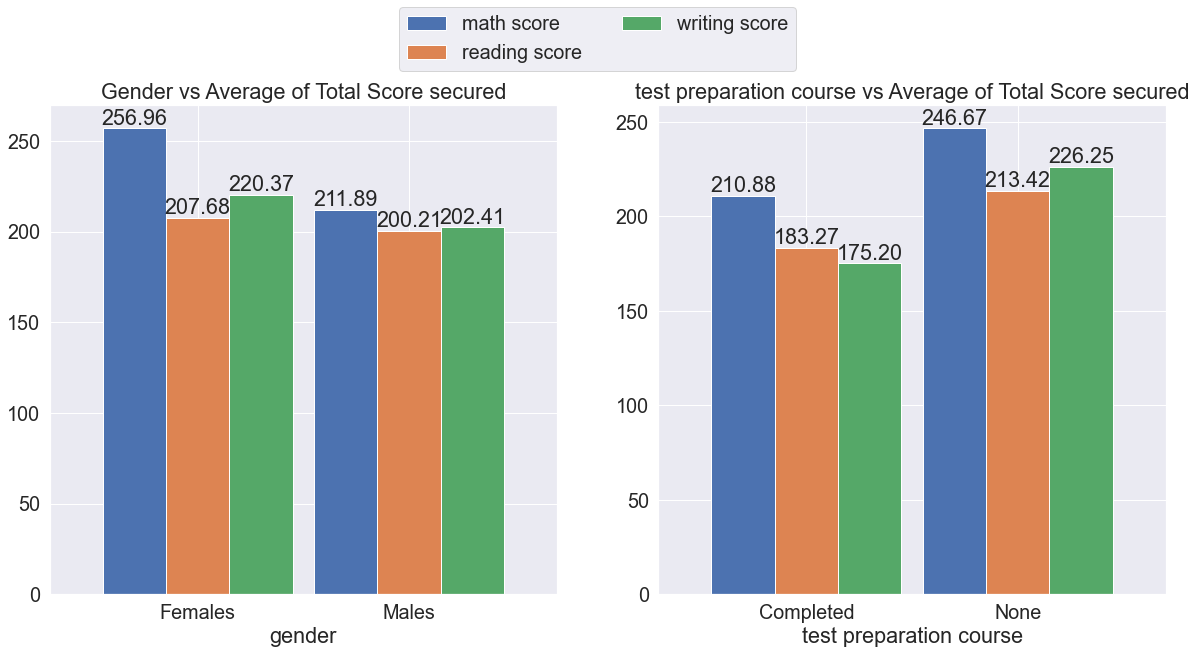

In [134]:
r1 = df.groupby(["gender"], as_index=False).agg({'math score':"var", 'reading score':"var", 'writing score':"var"})
r2 = df.groupby(["test preparation course"], as_index=False).agg({'math score':"var", 'reading score':"var", 'writing score':"var"})
fig, ax1 = plt.subplots(1,2,figsize=(20, 9))
g1=r1.plot(x="gender", y=["math score", "reading score", 'writing score'], kind="bar",ax=ax1[0],width=0.9)
tpc1=r2.plot(x="test preparation course", y=["math score", "reading score", 'writing score'], kind="bar",ax=ax1[1],width=0.9)
#tpc=sns.barplot(x="test preparation course", y="total score", data=df, order=result2['test preparation course'],ax=ax[1])
for p in g1.patches:
    g1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for q in tpc1.patches:
    tpc1.annotate(format(q.get_height(), '.2f'), (q.get_x() + q.get_width() / 2., q.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1[0].set_title('Gender vs Average of Total Score secured')
ax1[1].set_title('test preparation course vs Average of Total Score secured')
for axis in ax1:
    axis.grid(True)
sns.set(font_scale=1.8)
g1.legend(loc="lower center", bbox_to_anchor=(1.08, 1.05), ncol= 2)
tpc1.get_legend().remove()
g1.set_xticklabels(labels=["Females", "Males"], rotation=0)
tpc1.set_xticklabels(labels=["Completed", "None"], rotation=0)

<b>INSIGHTS</b>
<li>Males report more balanced results.</li>
<li>Females were more variable than males in mathematical and writing abilities</li>
<li>Both genders are almost equal variable in reading ability.(difference in varience is 7.47 only)</li>
<li>The variability of score secured by students who doesn't undergone test preparation course is higher in all subjects.</li>
<li>The variability difference between students who completed test preparation and who doesn't undergone the same in writing score is much higher than other 2 subjects.</li>
<li>Reading score variability is nearer for both categories of test preperation(completed/none)</li>
<br/>
<br/>
<br/>

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [135]:
#Generate 4 bins of equal distribution(ie, 25%,25%,25%,25% -> quartiles):
pd.qcut(df['math score'], q=4)

0      (-0.001, 57.0]
1      (-0.001, 57.0]
2      (-0.001, 57.0]
3      (-0.001, 57.0]
4      (-0.001, 57.0]
            ...      
995     (77.0, 100.0]
996     (77.0, 100.0]
997     (77.0, 100.0]
998     (77.0, 100.0]
999     (77.0, 100.0]
Name: math score, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-0.001, 57.0] < (57.0, 66.0] < (66.0, 77.0] < (77.0, 100.0]]

In [136]:
#getting number of values in each bin:
pd.qcut(df['math score'], q=4).value_counts()

(66.0, 77.0]      266
(-0.001, 57.0]    265
(57.0, 66.0]      238
(77.0, 100.0]     231
Name: math score, dtype: int64

<b>INSIGHTS</b>

| % of students | number of students | Maths score | 
| :-: | :-:  | :-:  |
| lowest 25% | 265 | 0-57 | 
| 25% | 238 | 57-66 |
| 25% | 266 | 66-77 | 
| highest 25% | 231 | 77-100 |

##### <li>From the above table the students those who secured a score from 77 to 100 in maths are the top 25% of students for the bonus points.</li>
##### <li>There were total 231 students who are eligible for the bonus points</li>
<br/><br/><br/>